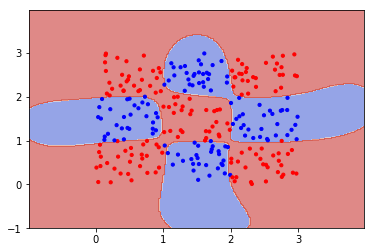

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Dataset = sio.loadmat('HW9_ex2.mat')

train_x = Dataset['train_X']
train_y = Dataset['train_y']
test_x = Dataset['test_X']
test_y = Dataset['test_y']


from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


#select kernel function:{'rbf','poly'}
clf = svm.SVC(kernel='rbf', C = 100,gamma=1,degree=5)
clf.fit(train_x.T, train_y.reshape(270))

X00, X11 = train_x[0, :], train_x[1, :]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y.reshape(270)]
plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

We will try to tune our model to find the best parameters.

We will evaluate our models with the mean(cross_val_score).In that way, we can score our model in many different pseudo-test sets and find a general score for our model.

More specificaly, if we just evaluated our model from the accurracy score of the predicted class vs the true class of the test set we probably get better score on a model that happens by chance to fit better on the test set.

CV is prefered because we want to avoid 'overfitting' the trained model to our test set, we want the best 'general' solution.

We will store the scores of each iteration in a dataframe to compare the result. Finally we choose the best parameters and run the model on the test set

In [35]:
#The script below takes about 10mins to execute.
from sklearn.model_selection import cross_val_score
import pandas as pd

Models_Scores = pd.DataFrame()
Models_Scores['Kernels'] = ['Linear', 'Polynomial','Rbf']

train_x = train_x.T
train_y = train_y.reshape(270)
for C in range(1, 1000, 100):
    scores = []
    clf = svm.SVC(kernel='rbf', C= C)
    scores = cross_val_score(clf, train_x, train_y, cv=10)
    rbf_score = np.mean(scores)
    
    scores = []
    clf = svm.SVC(kernel='linear', C= C)
    scores = cross_val_score(clf, train_x, train_y, cv=10)
    linear_score = np.mean(scores)
    
    scores = []
    clf = svm.SVC(kernel='poly', C= C)
    scores = cross_val_score(clf, train_x, train_y, cv=10)
    poly_score = np.mean(scores)
    
    Column = 'C = ' + str(C)
    Models_Scores[Column] = [linear_score, poly_score, rbf_score]

In [36]:
Models_Scores

,Kernels,C = 1,C = 101,C = 201,C = 301,C = 401,C = 501,C = 601,C = 701,C = 801,C = 901
0,Linear,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556
1,Polynomial,0.381481,0.329630,0.329630,0.329630,0.329630,0.329630,0.329630,0.329630,0.329630,0.329630
2,Rbf,0.333333,0.859259,0.877778,0.855556,0.892593,0.900000,0.903704,0.900000,0.900000,0.903704


From the parameter tuning process we found that the best parameters for our SVM classifier are:

Kernel: 'rbf'

C : 500 +
    
Now lets predict the class of our test set.

In [46]:
clf = svm.SVC(kernel='rbf', C= C)
clf.fit(train_x, train_y)
preds = clf.predict(test_x.T)
Error_SVM = (np.sum(i==1 for i in preds != test_y.reshape(270))) / len(preds)

print('SVM classifier error: ', round(Error_SVM,3))

SVM classifier error:  0.044
